In [17]:
import networkx as nx 
from scipy.sparse import csr_matrix
import random
import numpy as np
#importing the matplotlib library for plotting the graph 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#matplotlib.use('Agg')
from scipy.io import loadmat
from numpy import linalg as LA
import scipy.io

In [2]:
nvex = 68
random.seed(123456)

net_data = []
response = []
nrep = 100
A_erdos = np.zeros([nvex,nvex])
A_small = np.zeros([nvex,nvex])
A_commu = np.zeros([nvex,nvex])
A_scale = np.zeros([nvex,nvex])
for i in range(nrep):
    ## Erdos network
    G = nx.gnm_random_graph(nvex,400, seed=123) 
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_erdos = A_erdos + A
    net_data.append(A.reshape(nvex,nvex))
    ## Small world network
    G = nx.watts_strogatz_graph(nvex, 10, 0.5)
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_small = A_small + A
    net_data.append(A.reshape(nvex,nvex))
    ## Random Community network
    G = nx.random_partition_graph([34, 34], .25,.01)
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_commu = A_commu + A
    net_data.append(A.reshape(nvex, nvex))
    ## Scale free network
    G = nx.barabasi_albert_graph(nvex, 5)
    A = nx.adjacency_matrix(G)
    A = csr_matrix.todense(A)
    A_scale = A_scale + A
    net_data.append(A.reshape(nvex,nvex))

In [4]:
alpha = np.zeros(68)
alpha[0:17]=1


net_data = []
label = []
nrep = 100
for i in range(nrep):
    A = np.random.binomial(1,0.8*A_erdos/nrep, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    label.append(0.0)
    A = np.random.binomial(1,A_small/nrep, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    label.append(1.0)
    A = np.random.binomial(1,A_commu/nrep, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    label.append(2.0)
    A = np.random.binomial(1,A_scale/nrep, A.shape)
    # A = np.matmul(A,A)
    net_data.append(A.reshape(nvex,nvex))
    label.append(3.0)

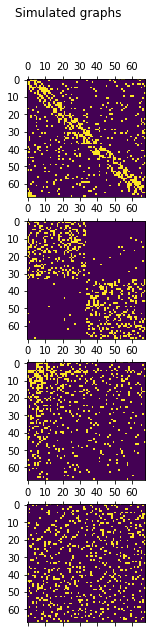

In [25]:
fig, axs = plt.subplots(4, figsize=(20, 10))
fig.suptitle('Simulated graphs')
axs[0].matshow(net_data[1])
axs[1].matshow(net_data[2])
axs[2].matshow(net_data[3])
axs[3].matshow(net_data[4])